In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [225]:
df=pd.read_csv('churn_prediction.csv')

In [309]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [83]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,45.696660,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,16.618105,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,13.416408,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,33.481338,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,44.922155,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,56.356011,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,113.573765,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [4]:
df.shape

(28382, 21)

In [5]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [6]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# Univariate Analysis

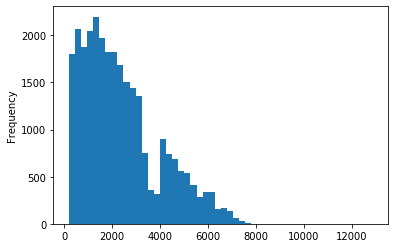

In [8]:
#Analysing vintage
df['vintage'].plot.hist(bins=50)

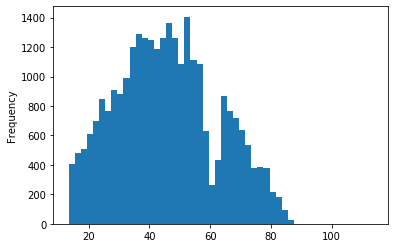

In [9]:
np.sqrt(df['vintage']).plot.hist(bins=50)

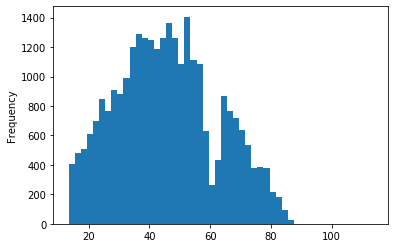

In [10]:
#Taking square root for normal distribution
df['vintage']=np.sqrt(df['vintage'])
df['vintage'].plot.hist(bins=50)

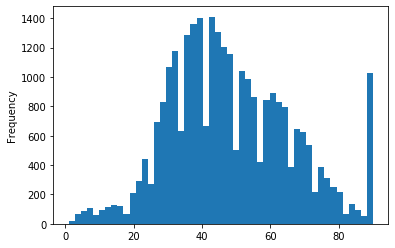

In [11]:
#Analysing age
df['age'].plot.hist(bins=50)

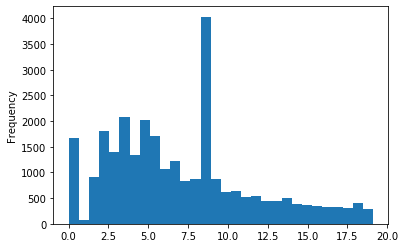

In [332]:
np.sqrt(df['days_since_last_transaction']).plot.hist(bins=30)

In [234]:
categorical_list=['gender','occupation','customer_nw_category','churn','city']
print('***Categorical variables count***')
for i in categorical_list:
    print(i,'\n')
    print(df[i].value_counts())
    print('___________\n')

***Categorical variables count***
gender 

Male      16642
Female    11740
Name: gender, dtype: int64
___________

occupation 

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64
___________

customer_nw_category 

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64
___________

churn 

0    23122
1     5260
Name: churn, dtype: int64
___________

city 

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
629.0        1
527.0        1
1212.0       1
530.0        1
70.0         1
Name: city, Length: 1604, dtype: int64
___________



(24111, 21)

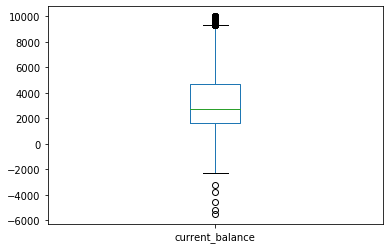

In [302]:
df.loc[df['current_balance']<10000]['current_balance'].plot.box()
df.loc[df['current_balance']<10000].shape

(24120, 21)

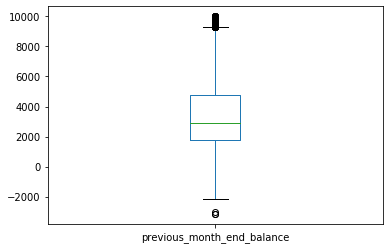

In [303]:
df.loc[df['previous_month_end_balance']<10000]['previous_month_end_balance'].plot.box()
df.loc[df['previous_month_end_balance']<10000].shape

(24223, 21)

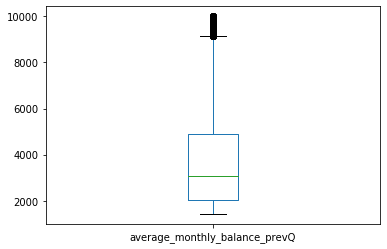

In [308]:
df.loc[df['average_monthly_balance_prevQ']<10000]['average_monthly_balance_prevQ'].plot.box()
df.loc[df['average_monthly_balance_prevQ']<10000].shape

(24310, 21)

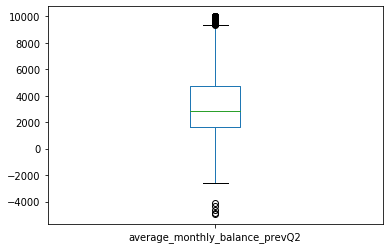

In [306]:
data=df.loc[df['average_monthly_balance_prevQ2']<10000]
data.loc[df['average_monthly_balance_prevQ2']>-5000]['average_monthly_balance_prevQ2'].plot.box()
df.loc[df['average_monthly_balance_prevQ2']<10000].shape

In [1]:
df.loc[df['current_month_balance']<12000]['current_month_balance'].plot.box()
df.loc[df['current_month_balance']<12000].shape

NameError: name 'df' is not defined

(24184, 21)

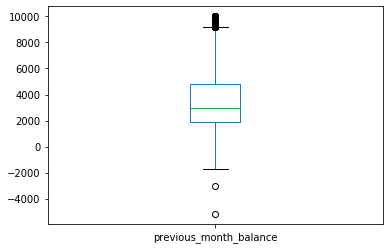

In [311]:
df.loc[df[pmb]<10000][pmb].plot.box()
df.loc[df[pmb]<10000].shape

In [321]:
df[df['current_month_credit']>10000000]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
24095,25712,1192,90,Male,0.0,retired,1020,2,5,18.0,...,24270.54,11728.39,111617.41,12269845.39,0.21,7637857.36,0.21,8399.62,24270.54,1


(1426, 21)

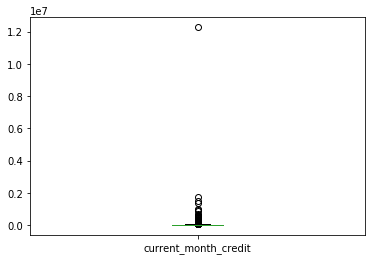

In [326]:
df.loc[df[cmc]>10000][cmc].plot.box()
df.loc[df[cmc]>10000].shape
#Clearly,removing outliers will make us lose a lot of data

In [281]:
data=df.loc[df['current_balance']<12000]

In [284]:
d=data.loc[df['previous_month_end_balance']<12000]

In [285]:
d.loc[df['average_monthly_balance_prevQ']<12000].shape

(24112, 21)

In [38]:
#Current balance has many outliers.Possible to take data lying within 12,000

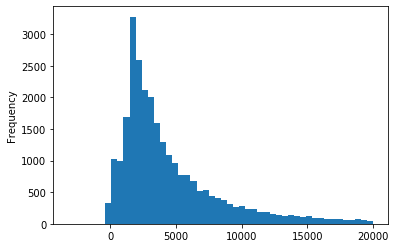

In [41]:
df.loc[df['previous_month_end_balance']<20000]['previous_month_end_balance'].plot.hist(bins=50)

In [42]:
df.loc[df['previous_month_end_balance']<20000].shape

(26791, 21)

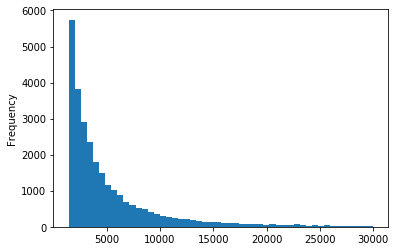

In [49]:
df.loc[df['average_monthly_balance_prevQ']<30000]['average_monthly_balance_prevQ'].plot.hist(bins=50)

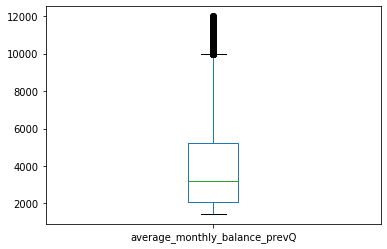

In [276]:
df.loc[df['average_monthly_balance_prevQ']<12000]['average_monthly_balance_prevQ'].plot.box()

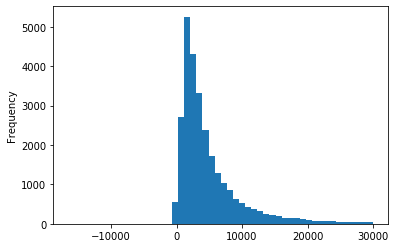

In [52]:
df.loc[df['average_monthly_balance_prevQ2']<30000]['average_monthly_balance_prevQ2'].plot.hist(bins=50)

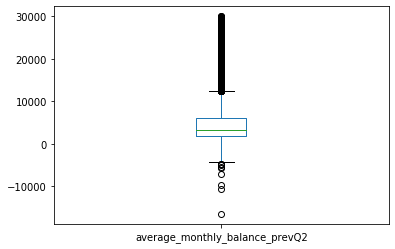

In [53]:
df.loc[df['average_monthly_balance_prevQ2']<30000]['average_monthly_balance_prevQ2'].plot.box()

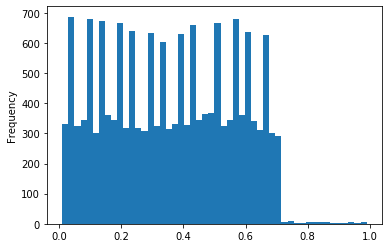

In [86]:
df.loc[df['current_month_credit']<1]['current_month_credit'].plot.hist(bins=50)

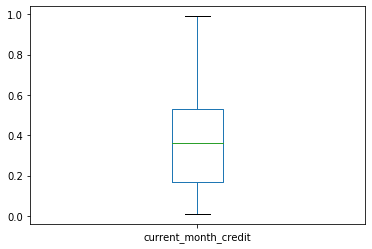

In [80]:
df.loc[df['current_month_credit']<1]['current_month_credit'].plot.box()

In [84]:
#The median current month credit is less than 1
#However, dropping anything above 1 means dropping almost 10,000 rows
#From .describe(),we can see prev_month credit is same

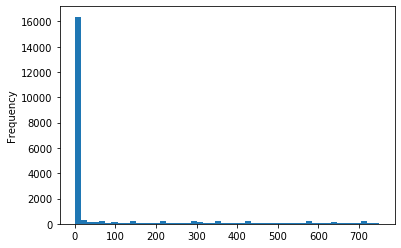

In [88]:
df.loc[df['previous_month_credit']<750]['previous_month_credit'].plot.hist(bins=50)

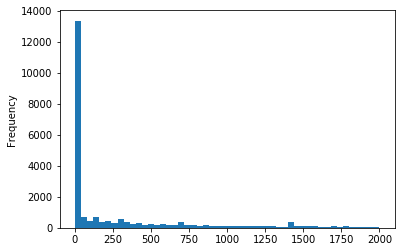

In [89]:
df.loc[df['current_month_debit']<2000]['current_month_debit'].plot.hist(bins=50)

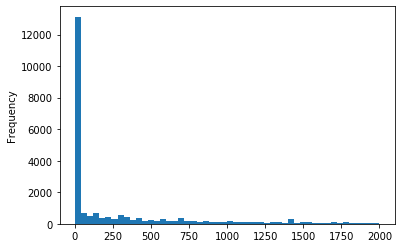

In [91]:
df.loc[df['previous_month_debit']<2000]['previous_month_debit'].plot.hist(bins=50)

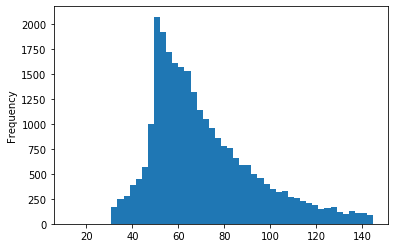

In [107]:
np.sqrt(df.loc[df['current_month_balance']<20000]['current_month_balance']+1000).plot.hist(bins=50)

In [108]:
df.loc[df['current_month_balance']<20000].shape

(26812, 21)

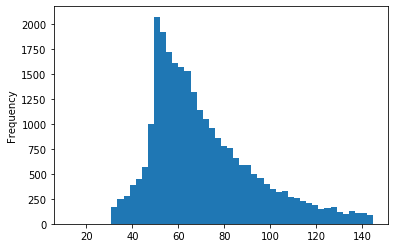

In [109]:
np.sqrt(df.loc[df['current_month_balance']<20000]['current_month_balance']+1000).plot.hist(bins=50)

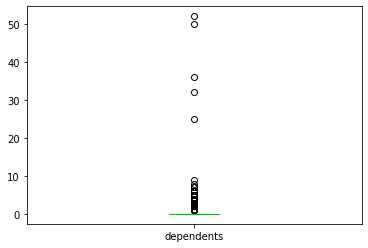

In [179]:
df['dependents'].plot.box()

In [266]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

# Bivariate Analysis

In [110]:
df.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006972,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006972,1.000000,0.216906,0.028743,0.042871,-0.165805,-0.396470,-0.092947,0.001386,0.002127,0.001375,-0.001502,0.002830,0.026655,0.004670,0.021885,-0.000151,0.001492,-0.068964
age,-0.000442,0.216906,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.028743,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.042871,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.165805,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.396470,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.092947,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.001386,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.002127,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


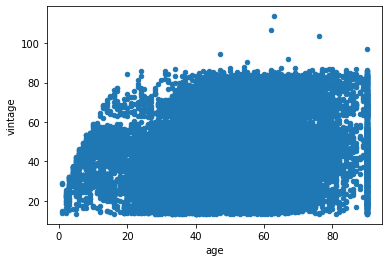

In [111]:
#Analyse age and vintage
df.plot.scatter('age','vintage')

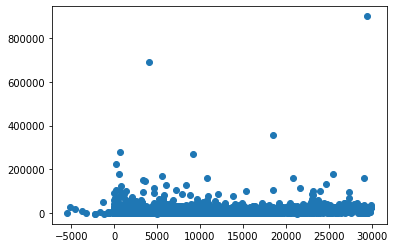

In [118]:
#Analyse current balance and prev month end balance
x=df.loc[df['current_balance']<30000]['current_balance']
y=df.loc[df['current_balance']<30000]['previous_month_end_balance']
plt.scatter(x,y)

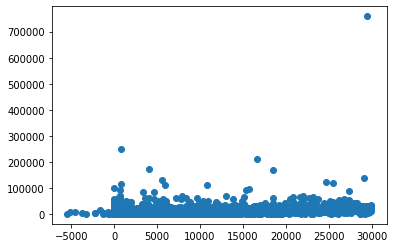

In [119]:
x=df.loc[df['current_balance']<30000]['current_balance']
y=df.loc[df['current_balance']<30000]['average_monthly_balance_prevQ']
plt.scatter(x,y)

0.7245718669006768


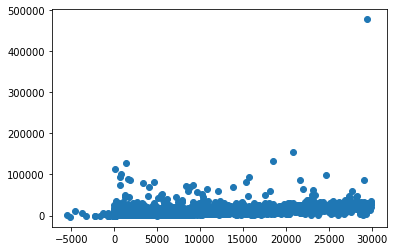

In [127]:
x=df.loc[df['current_balance']<30000]['current_balance']
y=df.loc[df['current_balance']<30000]['current_month_balance']
print(x.corr(y))
plt.scatter(x,y)

In [129]:
x=df.loc[df['current_balance']<30000]['current_balance']
y=df.loc[df['current_balance']<30000]['previous_month_balance']
x.corr(y)

0.4772376667627051

In [130]:
#Many of the correlations of >0.95 shown in corr() table are due to outliers
#Notice how corr comes down when they are not considered

In [141]:
df.groupby('churn')['current_month_balance'].mean()

churn
0    7579.267826
1    6887.874426
Name: current_month_balance, dtype: float64

In [145]:
df.groupby('churn')['current_month_credit'].mean()

churn
0    2670.323390
1    6786.948224
Name: current_month_credit, dtype: float64

In [144]:
df.groupby('churn')['current_month_debit'].mean()

churn
0    2467.586989
1    8894.855785
Name: current_month_debit, dtype: float64

In [146]:
df.groupby('churn')['age'].mean()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

In [158]:
df.groupby('churn')['vintage'].mean()

churn
0    46.243268
1    43.293872
Name: vintage, dtype: float64

In [159]:
continuous=['current_month_balance',
            'current_month_credit',
            'current_month_debit',
            'previous_month_balance','previous_month_credit','previous_month_debit',
           'average_monthly_balance_prevQ']
for i in continuous:
    print('*** ',i,' ***\n')
    print(df.groupby('gender')[i].mean(),'\n')

***  current_month_balance  ***

gender
Female    6423.555371
Male      7389.013915
Name: current_month_balance, dtype: float64 

***  current_month_credit  ***

gender
Female    2251.921145
Male      4035.692208
Name: current_month_credit, dtype: float64 

***  current_month_debit  ***

gender
Female    2672.832396
Male      4076.060357
Name: current_month_debit, dtype: float64 

***  previous_month_balance  ***

gender
Female    6533.850829
Male      7421.493478
Name: previous_month_balance, dtype: float64 

***  previous_month_credit  ***

gender
Female    2342.253927
Male      3753.678121
Name: previous_month_credit, dtype: float64 

***  previous_month_debit  ***

gender
Female    2521.188909
Male      3729.175149
Name: previous_month_debit, dtype: float64 

***  average_monthly_balance_prevQ  ***

gender
Female    6526.645941
Male      7422.922377
Name: average_monthly_balance_prevQ, dtype: float64 



In [162]:
#current month and previous month credit can be used to impute missing gender values
df['avg_credit']=(df['current_month_credit']+df['previous_month_credit'])/2
df.groupby('gender')['avg_credit'].mean()

gender
Female    2297.087536
Male      3894.685164
Name: avg_credit, dtype: float64

In [219]:
l=['gender','occupation','customer_nw_category','churn','dependents']
for i in range(0,5):
    for j in range(i+1,5):
        print('  ',l[i],'and',l[j],'\n')
        print(pd.crosstab(index=df[l[i]],columns=df[l[j]]),'\n')

   gender and occupation 

occupation  company  retired  salaried  self_employed  student
gender                                                        
Female           10      389      1838           8477     1006
Male             30     1635      4866           8999     1052 

   gender and customer_nw_category 

customer_nw_category     1     2     3
gender                                
Female                1801  6107  3832
Male                  1910  8452  6280 

   gender and churn 

churn       0     1
gender             
Female   9668  2072
Male    13454  3188 

   gender and dependents 

dependents    0.0   1.0   2.0  3.0
gender                            
Female       9726   346   324   75
Male        11709  1049  1826  864 

   occupation and customer_nw_category 

customer_nw_category     1     2     3
occupation                            
company                  6    17    17
retired                232  1047   745
salaried               800  3270  2634
self_employed  

In [227]:
#Imputing missing gender values
for i in range(len(df)):
    if df['gender'][i]!='Male' and df['gender'][i]!='Female':
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]>=2:
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im

In [228]:
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

In [229]:
#Convert dependents into categorical
for i in range(len(df)):
    if df['dependents'][i]>2:
        df['dependents'][i]=3

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [214]:
df['dependents'].value_counts()

0.0    21435
2.0     2150
1.0     1395
3.0      939
Name: dependents, dtype: int64

In [236]:
df=df.astype({'dependents':'object','city':'object'})

In [231]:
df['dependents']

0          0
1          0
2          0
3        NaN
4          2
        ... 
28377      0
28378      0
28379      0
28380      3
28381      0
Name: dependents, Length: 28382, dtype: object

In [264]:
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self_employed')

In [233]:
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Female,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [240]:
l=['gender','occupation','customer_nw_category','churn','dependents']
for i in l:
    print('***',i,'***\n')
    print(df.groupby(i)['days_since_last_transaction'].mean(),'\n')

*** gender ***

gender
Female    78.783906
Male      64.016768
Name: days_since_last_transaction, dtype: float64 

*** occupation ***

occupation
company          72.029412
retired          68.125490
salaried         62.867931
self_employed    70.655480
student          92.476278
Name: days_since_last_transaction, dtype: float64 

*** customer_nw_category ***

customer_nw_category
1    56.485035
2    71.599922
3    72.844684
Name: days_since_last_transaction, dtype: float64 

*** churn ***

churn
0    72.386771
1    60.271518
Name: days_since_last_transaction, dtype: float64 

*** dependents ***

dependents
0.0    74.269514
1.0    50.563677
2.0    48.149831
3.0    49.329171
Name: days_since_last_transaction, dtype: float64 



In [246]:
df[df['days_since_last_transaction'].isnull()==True]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
2,4,2356,31,Male,0,salaried,146,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
15,17,1934,51,Female,0,self_employed,1232,3,149,NaN,...,1994.84,1829.43,2415.57,0.16,0.16,128.66,360.70,1960.91,1840.23,0
21,24,2083,29,Female,0,self_employed,1020,2,1106,NaN,...,5149.74,5569.58,4826.60,0.47,0.47,357.61,786.19,5029.05,5744.21,1
25,28,606,76,Male,0,self_employed,1533,3,881,NaN,...,14289.26,14289.26,14443.43,0.64,0.64,0.64,0.64,14289.26,14289.26,0
29,32,2204,33,Female,0,salaried,834,2,14,NaN,...,6161.67,6163.13,6156.28,0.11,0.11,0.11,0.11,6152.98,6165.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,30283,3409,26,Female,0,student,334,2,82,NaN,...,7422.94,7422.94,7375.91,0.01,0.01,0.01,0.01,7422.94,7422.94,0
28364,30284,1936,72,Male,0,self_employed,656,2,1964,NaN,...,3453.68,3551.89,3615.19,0.44,0.44,0.44,214.73,3453.68,3540.40,0
28365,30285,3853,35,Male,0,self_employed,223,2,187,NaN,...,2535.64,2616.38,3212.75,0.56,0.56,214.84,0.56,2454.36,2535.64,0
28376,30296,2155,85,Male,0,retired,1589,2,389,NaN,...,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0


In [247]:
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [265]:
df.isnull().sum()

customer_id                         0
vintage                             0
age                                 0
gender                              0
dependents                          0
occupation                          0
city                              803
customer_nw_category                0
branch_code                         0
days_since_last_transaction         0
current_balance                     0
previous_month_end_balance          0
average_monthly_balance_prevQ       0
average_monthly_balance_prevQ2      0
current_month_credit                0
previous_month_credit               0
current_month_debit                 0
previous_month_debit                0
current_month_balance               0
previous_month_balance              0
churn                               0
dtype: int64

In [ ]:
#Right now not taking city and branch_code variable